In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import copy
import csv
import glob

In [24]:
FeP_CO = './CO-FeP-8014.csv'
FeP_CO = (pd.read_csv(FeP_CO)).values
data_sets = FeP_CO[:,1:]
print(data_sets.shape,'\n'
      ,data_sets[0,27]
     )
bad_data_set = np.where(data_sets[:,:27]<0)[0]
bad_data_set = np.unique(bad_data_set)
data_sets = np.delete(data_sets,bad_data_set,axis=0)  #删除描述符小于0的样本
print(data_sets.shape,data_sets[0,:])

#用固定随机种子打乱二维数组的行顺序
np.random.seed(1)
np.random.shuffle(data_sets)
print(data_sets[0,:])

standar_scaler = preprocessing.StandardScaler()
x = data_sets[:,1:28]
y = data_sets[:,31].reshape(-1,1)
print(x[0,:],y[0,:])
x = standar_scaler.fit_transform(x)
print(x.shape,y.shape)
data_sets = np.hstack((x,y))
print(data_sets[0,:])

(8014, 32) 
 34.3839
(7822, 32) [ 0.00000000e+00  7.97749000e+01  7.88000000e-02  5.70100000e-01
  9.12968000e+01  7.80000000e-02  6.02900000e-01  1.90057800e+02
  3.27700000e-01  1.73490000e+00  3.26569200e+02  3.66810000e+00
  1.49500000e-01  3.48180800e+02  3.20490000e+00  1.58600000e-01
  5.05609800e+02  1.39000000e+00  1.62300000e-01  5.35343700e+02
  2.05100000e+00  2.36900000e-01  6.24982200e+02  2.10889000e+01
  2.31570000e+00  2.06517650e+03  6.14578600e+02  3.43839000e+01
 -1.23606292e+01  1.68108900e+00  1.16001000e+00  1.77715561e+02]
[ 8.02800000e+03  1.02902600e+02  3.00000000e-03  5.24200000e-01
  1.14185700e+02  1.92000000e-02  4.35200000e-01  1.90667300e+02
  9.07700000e-01  1.55590000e+00  2.77268200e+02  3.13600000e+00
  1.21400000e-01  3.36798300e+02  3.02460000e+00  1.83600000e-01
  5.33082900e+02  1.09520000e+00  8.13400000e-01  5.53714000e+02
  4.46180000e+00  1.59890000e+00  6.33117800e+02  2.09644000e+01
  1.45240000e+00  1.95105490e+03  5.52400700e+02  3.07862

In [25]:
k_fold = 5
one_fold = int(data_sets.shape[0]/k_fold)
redundant = data_sets.shape[0] - one_fold*k_fold
print(one_fold,'       ',redundant)


1564         2


In [26]:
data_sets_1 = data_sets[0:1565,:]
data_sets_2 = data_sets[1565:3130,:]
data_sets_3 = data_sets[3130:4694,:]
data_sets_4 = data_sets[4694:6258,:]
data_sets_5 = data_sets[6258:7822,:]
print(data_sets_1.shape,data_sets_2.shape,data_sets_3.shape,data_sets_4.shape,data_sets_5.shape)
data_sets_new = np.vstack((data_sets_1,data_sets_2))
data_sets_new = np.vstack((data_sets_new,data_sets_3))
data_sets_new = np.vstack((data_sets_new,data_sets_4))
data_sets_new = np.vstack((data_sets_new,data_sets_5))
print((data_sets == data_sets_new).all())

(1565, 28) (1565, 28) (1564, 28) (1564, 28) (1564, 28)
True


In [27]:
data_sets_train = np.vstack((data_sets_2,data_sets_3))
data_sets_train = np.vstack((data_sets_train,data_sets_4))
data_sets_train = np.vstack((data_sets_train,data_sets_5))
data_sets_test  = data_sets_1
print(data_sets_train.shape,data_sets_test.shape)
x_train = data_sets_train[:,:-1]
y_train = data_sets_train[:,-1]
x_test = data_sets_test[:,:-1]
y_test = data_sets_test[:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6257, 28) (1565, 28)
(6257, 27) (6257,) (1565, 27) (1565,)


In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(x_train.shape[1],),activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.03),name="layer1"),
#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.02),name="layer2"),
#     tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(32, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.01),name="layer3"),

    tf.keras.layers.Dense(1,name="layer4")
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               3584      
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer3 (Dense)               (None, 32)                2080      
_________________________________________________________________
layer4 (Dense)               (None, 1)                 33        
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________________________


In [29]:
layer0 = model.layers[0].get_weights()
print(layer0[0].shape)       #权重
print(layer0[1].shape)       #偏置
print(layer0[0][0,0],layer0[1][0])        #每次初始化的权重值都不一样
# print(layer0[1])   
# print(model.layers[1].get_weights)

(27, 128)
(128,)
-0.11376764 0.0


In [30]:
print(len(model.layers[0].weights))
print(len(model.layers[1].weights))
print(len(model.layers[2].weights))
print(len(model.layers[3].weights))

2
2
2
2


In [31]:
Reduce=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.95,patience=10,
#                          verbose=1,
                         mode='auto',
                         min_delta=0.000001,
                         cooldown=0,
                         min_lr=0)

In [32]:
exponential_decay = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=0.05, decay_steps=50, decay_rate=0.99)

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam()
              ,loss='mse'          
             )

In [34]:
checkpoint_save_path = "./Fe-C/Fe-C.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('- - - - - - - - - - - -load the model- - - - - - - - - - - -')
    model.load_weights(checkpoint_save_path)

- - - - - - - - - - - -load the model- - - - - - - - - - - -


In [35]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)

In [36]:
layer0 = model.layers[0].get_weights()
print(layer0[0].shape)       #权重
print(layer0[1].shape)       #偏置
print(layer0[0][0,0],layer0[1][0])        #每次初始化的权重值都不一样
# print(layer0[1])  

(27, 128)
(128,)
0.047387958 0.31300384


In [15]:
history = model.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=5000, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback,Reduce]
#                     ,callbacks=[reduce_lr]
                   )

Epoch 1/5000
1/1 [==============================] - 3s 3s/step - loss: 28760.0195 - val_loss: 28702.0098
Epoch 2/5000
1/1 [==============================] - 0s 64ms/step - loss: 28699.8047 - val_loss: 28638.2168
Epoch 3/5000
1/1 [==============================] - 0s 66ms/step - loss: 28636.9844 - val_loss: 28571.1738
Epoch 4/5000
1/1 [==============================] - 0s 59ms/step - loss: 28570.9922 - val_loss: 28500.3867
Epoch 5/5000
1/1 [==============================] - 0s 62ms/step - loss: 28501.2266 - val_loss: 28425.2578
Epoch 6/5000
1/1 [==============================] - 0s 75ms/step - loss: 28427.3027 - val_loss: 28345.3926
Epoch 7/5000
1/1 [==============================] - 0s 64ms/step - loss: 28348.7520 - val_loss: 28260.5410
Epoch 8/5000
1/1 [==============================] - ETA: 0s - loss: 28265.267 - 0s 67ms/step - loss: 28265.2676 - val_loss: 28170.3242
Epoch 9/5000
1/1 [==============================] - 0s 88ms/step - loss: 28176.5059 - val_loss: 28074.4590
Epoch 10/50

Epoch 77/5000
1/1 [==============================] - 0s 72ms/step - loss: 2815.6934 - val_loss: 2821.2361
Epoch 78/5000
1/1 [==============================] - 0s 102ms/step - loss: 2775.2039 - val_loss: 2784.9761
Epoch 79/5000
1/1 [==============================] - 0s 92ms/step - loss: 2730.0854 - val_loss: 2739.3906
Epoch 80/5000
1/1 [==============================] - 0s 76ms/step - loss: 2678.0991 - val_loss: 2683.5459
Epoch 81/5000
1/1 [==============================] - 0s 53ms/step - loss: 2618.2317 - val_loss: 2617.7351
Epoch 82/5000
1/1 [==============================] - 0s 61ms/step - loss: 2550.6108 - val_loss: 2543.2654
Epoch 83/5000
1/1 [==============================] - 0s 64ms/step - loss: 2476.2891 - val_loss: 2462.0171
Epoch 84/5000
1/1 [==============================] - 0s 70ms/step - loss: 2396.8940 - val_loss: 2376.2915
Epoch 85/5000
1/1 [==============================] - 0s 62ms/step - loss: 2314.4370 - val_loss: 2288.5662
Epoch 86/5000
1/1 [==========================

Epoch 232/5000
1/1 [==============================] - 0s 72ms/step - loss: 484.8716 - val_loss: 506.3626
Epoch 233/5000
1/1 [==============================] - 0s 97ms/step - loss: 482.7296 - val_loss: 504.2857
Epoch 234/5000
1/1 [==============================] - 0s 120ms/step - loss: 480.6047 - val_loss: 502.2252
Epoch 235/5000
1/1 [==============================] - 0s 103ms/step - loss: 478.4989 - val_loss: 500.1806
Epoch 236/5000
1/1 [==============================] - 0s 98ms/step - loss: 476.4116 - val_loss: 498.1514
Epoch 237/5000
1/1 [==============================] - 0s 79ms/step - loss: 474.3406 - val_loss: 496.1368
Epoch 238/5000
1/1 [==============================] - 0s 128ms/step - loss: 472.2842 - val_loss: 494.1366
Epoch 239/5000
1/1 [==============================] - 0s 97ms/step - loss: 470.2428 - val_loss: 492.1559
Epoch 240/5000
1/1 [==============================] - 0s 78ms/step - loss: 468.2180 - val_loss: 490.1887
Epoch 241/5000
1/1 [==============================] 

Epoch 310/5000
1/1 [==============================] - 0s 60ms/step - loss: 354.5276 - val_loss: 379.0758
Epoch 311/5000
1/1 [==============================] - 0s 74ms/step - loss: 353.2009 - val_loss: 377.7654
Epoch 312/5000
1/1 [==============================] - 0s 71ms/step - loss: 351.8803 - val_loss: 376.4615
Epoch 313/5000
1/1 [==============================] - 0s 77ms/step - loss: 350.5660 - val_loss: 375.1615
Epoch 314/5000
1/1 [==============================] - 0s 85ms/step - loss: 349.2581 - val_loss: 373.8672
Epoch 315/5000
1/1 [==============================] - 0s 79ms/step - loss: 347.9564 - val_loss: 372.5804
Epoch 316/5000
1/1 [==============================] - 0s 86ms/step - loss: 346.6617 - val_loss: 371.3006
Epoch 317/5000
1/1 [==============================] - 0s 109ms/step - loss: 345.3732 - val_loss: 370.0292
Epoch 318/5000
1/1 [==============================] - 0s 83ms/step - loss: 344.0904 - val_loss: 368.7616
Epoch 319/5000
1/1 [==============================] - 

Epoch 388/5000
1/1 [==============================] - 0s 122ms/step - loss: 267.1919 - val_loss: 292.0731
Epoch 389/5000
1/1 [==============================] - 0s 97ms/step - loss: 266.2544 - val_loss: 291.1258
Epoch 390/5000
1/1 [==============================] - 0s 80ms/step - loss: 265.3204 - val_loss: 290.1812
Epoch 391/5000
1/1 [==============================] - 0s 110ms/step - loss: 264.3898 - val_loss: 289.2397
Epoch 392/5000
1/1 [==============================] - 0s 130ms/step - loss: 263.4636 - val_loss: 288.3006
Epoch 393/5000
1/1 [==============================] - 0s 92ms/step - loss: 262.5412 - val_loss: 287.3664
Epoch 394/5000
1/1 [==============================] - 0s 94ms/step - loss: 261.6233 - val_loss: 286.4359
Epoch 395/5000
1/1 [==============================] - 0s 125ms/step - loss: 260.7104 - val_loss: 285.5085
Epoch 396/5000
1/1 [==============================] - 0s 112ms/step - loss: 259.8029 - val_loss: 284.5854
Epoch 397/5000
1/1 [==============================

Epoch 543/5000
1/1 [==============================] - 0s 111ms/step - loss: 164.7058 - val_loss: 186.2676
Epoch 544/5000
1/1 [==============================] - 0s 100ms/step - loss: 164.2623 - val_loss: 185.8067
Epoch 545/5000
1/1 [==============================] - 0s 109ms/step - loss: 163.8210 - val_loss: 185.3482
Epoch 546/5000
1/1 [==============================] - 0s 82ms/step - loss: 163.3821 - val_loss: 184.8918
Epoch 547/5000
1/1 [==============================] - 0s 84ms/step - loss: 162.9453 - val_loss: 184.4375
Epoch 548/5000
1/1 [==============================] - 0s 92ms/step - loss: 162.5107 - val_loss: 183.9859
Epoch 549/5000
1/1 [==============================] - 0s 89ms/step - loss: 162.0780 - val_loss: 183.5373
Epoch 550/5000
1/1 [==============================] - 0s 67ms/step - loss: 161.6478 - val_loss: 183.0920
Epoch 551/5000
1/1 [==============================] - 0s 71ms/step - loss: 161.2198 - val_loss: 182.6485
Epoch 552/5000
1/1 [==============================] 

Epoch 698/5000
1/1 [==============================] - 0s 93ms/step - loss: 114.7509 - val_loss: 134.4470
Epoch 699/5000
1/1 [==============================] - 0s 107ms/step - loss: 114.5147 - val_loss: 134.2010
Epoch 700/5000
1/1 [==============================] - 0s 145ms/step - loss: 114.2797 - val_loss: 133.9557
Epoch 701/5000
1/1 [==============================] - 0s 109ms/step - loss: 114.0454 - val_loss: 133.7116
Epoch 702/5000
1/1 [==============================] - 0s 79ms/step - loss: 113.8119 - val_loss: 133.4688
Epoch 703/5000
1/1 [==============================] - 0s 87ms/step - loss: 113.5789 - val_loss: 133.2267
Epoch 704/5000
1/1 [==============================] - 0s 139ms/step - loss: 113.3463 - val_loss: 132.9850
Epoch 705/5000
1/1 [==============================] - 0s 109ms/step - loss: 113.1144 - val_loss: 132.7442
Epoch 706/5000
1/1 [==============================] - 0s 98ms/step - loss: 112.8834 - val_loss: 132.5040
Epoch 707/5000
1/1 [==============================

Epoch 776/5000
1/1 [==============================] - 0s 94ms/step - loss: 98.3398 - val_loss: 117.0826
Epoch 777/5000
1/1 [==============================] - 0s 74ms/step - loss: 98.1518 - val_loss: 116.8810
Epoch 778/5000
1/1 [==============================] - 0s 75ms/step - loss: 97.9641 - val_loss: 116.6808
Epoch 779/5000
1/1 [==============================] - 0s 86ms/step - loss: 97.7777 - val_loss: 116.4808
Epoch 780/5000
1/1 [==============================] - 0s 78ms/step - loss: 97.5906 - val_loss: 116.2825
Epoch 781/5000
1/1 [==============================] - 0s 67ms/step - loss: 97.4046 - val_loss: 116.0841
Epoch 782/5000
1/1 [==============================] - 0s 72ms/step - loss: 97.2186 - val_loss: 115.8867
Epoch 783/5000
1/1 [==============================] - 0s 62ms/step - loss: 97.0332 - val_loss: 115.6912
Epoch 784/5000
1/1 [==============================] - 0s 81ms/step - loss: 96.8482 - val_loss: 115.4980
Epoch 785/5000
1/1 [==============================] - 0s 126ms/s

1/1 [==============================] - 0s 132ms/step - loss: 71.6631 - val_loss: 87.9211
Epoch 934/5000
1/1 [==============================] - 0s 101ms/step - loss: 71.4920 - val_loss: 87.7116
Epoch 935/5000
1/1 [==============================] - 0s 110ms/step - loss: 71.3211 - val_loss: 87.5332
Epoch 936/5000
1/1 [==============================] - 0s 93ms/step - loss: 71.1493 - val_loss: 87.3758
Epoch 937/5000
1/1 [==============================] - 0s 82ms/step - loss: 70.9777 - val_loss: 87.1928
Epoch 938/5000
1/1 [==============================] - 0s 103ms/step - loss: 70.8066 - val_loss: 86.9813
Epoch 939/5000
1/1 [==============================] - 0s 120ms/step - loss: 70.6353 - val_loss: 86.7996
Epoch 940/5000
1/1 [==============================] - 0s 82ms/step - loss: 70.4644 - val_loss: 86.6577
Epoch 941/5000
1/1 [==============================] - 0s 78ms/step - loss: 70.2945 - val_loss: 86.4589
Epoch 942/5000
1/1 [==============================] - 0s 146ms/step - loss: 70.1234

1/1 [==============================] - 0s 88ms/step - loss: 46.1914 - val_loss: 60.7893
Epoch 1091/5000
1/1 [==============================] - 0s 75ms/step - loss: 46.0391 - val_loss: 60.6458
Epoch 1092/5000
1/1 [==============================] - 0s 91ms/step - loss: 45.8874 - val_loss: 60.3927
Epoch 1093/5000
1/1 [==============================] - 0s 67ms/step - loss: 45.7356 - val_loss: 60.2574
Epoch 1094/5000
1/1 [==============================] - 0s 75ms/step - loss: 45.5838 - val_loss: 60.0305
Epoch 1095/5000
1/1 [==============================] - 0s 98ms/step - loss: 45.4314 - val_loss: 59.8604
Epoch 1096/5000
1/1 [==============================] - 0s 91ms/step - loss: 45.2796 - val_loss: 59.6828
Epoch 1097/5000
1/1 [==============================] - 0s 95ms/step - loss: 45.1279 - val_loss: 59.4879
Epoch 1098/5000
1/1 [==============================] - 0s 84ms/step - loss: 44.9767 - val_loss: 59.3411
Epoch 1099/5000
1/1 [==============================] - 0s 80ms/step - loss: 44.8

1/1 [==============================] - 0s 97ms/step - loss: 25.7325 - val_loss: 34.2291
Epoch 1247/5000
1/1 [==============================] - 0s 124ms/step - loss: 25.6223 - val_loss: 34.0646
Epoch 1248/5000
1/1 [==============================] - 0s 107ms/step - loss: 25.5126 - val_loss: 33.9112
Epoch 1249/5000
1/1 [==============================] - 0s 133ms/step - loss: 25.4035 - val_loss: 33.7440
Epoch 1250/5000
1/1 [==============================] - 0s 139ms/step - loss: 25.2944 - val_loss: 33.5915
Epoch 1251/5000
1/1 [==============================] - 0s 74ms/step - loss: 25.1856 - val_loss: 33.4187
Epoch 1252/5000
1/1 [==============================] - 0s 103ms/step - loss: 25.0770 - val_loss: 33.2720
Epoch 1253/5000
1/1 [==============================] - 0s 88ms/step - loss: 24.9686 - val_loss: 33.0998
Epoch 1254/5000
1/1 [==============================] - 0s 90ms/step - loss: 24.8604 - val_loss: 32.9643
Epoch 1255/5000
1/1 [==============================] - 0s 120ms/step - loss

1/1 [==============================] - 0s 146ms/step - loss: 13.1028 - val_loss: 16.5882
Epoch 1403/5000
1/1 [==============================] - 0s 106ms/step - loss: 13.0551 - val_loss: 16.5101
Epoch 1404/5000
1/1 [==============================] - 0s 137ms/step - loss: 13.0080 - val_loss: 16.4569
Epoch 1405/5000
1/1 [==============================] - 0s 125ms/step - loss: 12.9612 - val_loss: 16.3762
Epoch 1406/5000
1/1 [==============================] - 0s 90ms/step - loss: 12.9151 - val_loss: 16.3254
Epoch 1407/5000
1/1 [==============================] - 0s 137ms/step - loss: 12.8695 - val_loss: 16.2439
Epoch 1408/5000
1/1 [==============================] - 0s 94ms/step - loss: 12.8242 - val_loss: 16.1963
Epoch 1409/5000
1/1 [==============================] - 0s 97ms/step - loss: 12.7789 - val_loss: 16.1124
Epoch 1410/5000
1/1 [==============================] - 0s 82ms/step - loss: 12.7340 - val_loss: 16.0664
Epoch 1411/5000
1/1 [==============================] - 0s 97ms/step - loss:

1/1 [==============================] - 0s 51ms/step - loss: 9.1504 - val_loss: 10.8499
Epoch 1560/5000
1/1 [==============================] - 0s 61ms/step - loss: 9.1303 - val_loss: 10.8705
Epoch 1561/5000
1/1 [==============================] - 0s 73ms/step - loss: 9.1225 - val_loss: 10.8265
Epoch 1562/5000
1/1 [==============================] - 0s 64ms/step - loss: 9.1263 - val_loss: 10.8668
Epoch 1563/5000
1/1 [==============================] - 0s 66ms/step - loss: 9.1269 - val_loss: 10.7950
Epoch 1564/5000
1/1 [==============================] - 0s 75ms/step - loss: 9.1063 - val_loss: 10.7806
Epoch 1565/5000
1/1 [==============================] - 0s 64ms/step - loss: 9.0654 - val_loss: 10.7203
Epoch 1566/5000
1/1 [==============================] - 0s 74ms/step - loss: 9.0304 - val_loss: 10.7022
Epoch 1567/5000
1/1 [==============================] - 0s 66ms/step - loss: 9.0205 - val_loss: 10.7214
Epoch 1568/5000
1/1 [==============================] - 0s 60ms/step - loss: 9.0278 - val_

1/1 [==============================] - 0s 85ms/step - loss: 7.8772 - val_loss: 9.0469
Epoch 1719/5000
1/1 [==============================] - 0s 86ms/step - loss: 7.8724 - val_loss: 9.0388
Epoch 1720/5000
1/1 [==============================] - 0s 86ms/step - loss: 7.8675 - val_loss: 9.0325
Epoch 1721/5000
1/1 [==============================] - 0s 105ms/step - loss: 7.8627 - val_loss: 9.0242
Epoch 1722/5000
1/1 [==============================] - 0s 111ms/step - loss: 7.8579 - val_loss: 9.0177
Epoch 1723/5000
1/1 [==============================] - 0s 96ms/step - loss: 7.8531 - val_loss: 9.0100
Epoch 1724/5000
1/1 [==============================] - 0s 139ms/step - loss: 7.8483 - val_loss: 9.0033
Epoch 1725/5000
1/1 [==============================] - 0s 116ms/step - loss: 7.8436 - val_loss: 8.9959
Epoch 1726/5000
1/1 [==============================] - 0s 75ms/step - loss: 7.8389 - val_loss: 8.9892
Epoch 1727/5000
1/1 [==============================] - 0s 123ms/step - loss: 7.8342 - val_loss

1/1 [==============================] - 0s 94ms/step - loss: 7.3451 - val_loss: 8.2202
Epoch 1879/5000
1/1 [==============================] - 0s 94ms/step - loss: 7.3334 - val_loss: 8.2193
Epoch 1880/5000
1/1 [==============================] - 0s 100ms/step - loss: 7.3237 - val_loss: 8.2049
Epoch 1881/5000
1/1 [==============================] - 0s 121ms/step - loss: 7.3175 - val_loss: 8.2057
Epoch 1882/5000
1/1 [==============================] - 0s 85ms/step - loss: 7.3150 - val_loss: 8.2035
Epoch 1883/5000
1/1 [==============================] - 0s 81ms/step - loss: 7.3152 - val_loss: 8.2029
Epoch 1884/5000
1/1 [==============================] - 0s 73ms/step - loss: 7.3165 - val_loss: 8.2058
Epoch 1885/5000
1/1 [==============================] - 0s 82ms/step - loss: 7.3172 - val_loss: 8.1994
Epoch 1886/5000
1/1 [==============================] - 0s 77ms/step - loss: 7.3161 - val_loss: 8.2002
Epoch 1887/5000
1/1 [==============================] - 0s 77ms/step - loss: 7.3129 - val_loss: 8

1/1 [==============================] - 0s 82ms/step - loss: 7.0206 - val_loss: 7.7989
Epoch 2039/5000
1/1 [==============================] - 0s 66ms/step - loss: 7.0218 - val_loss: 7.7836
Epoch 2040/5000
1/1 [==============================] - 0s 98ms/step - loss: 7.0243 - val_loss: 7.8082
Epoch 2041/5000
1/1 [==============================] - 0s 72ms/step - loss: 7.0285 - val_loss: 7.7887
Epoch 2042/5000
1/1 [==============================] - 0s 77ms/step - loss: 7.0352 - val_loss: 7.8281
Epoch 2043/5000
1/1 [==============================] - 0s 97ms/step - loss: 7.0445 - val_loss: 7.8033
Epoch 2044/5000
1/1 [==============================] - 0s 126ms/step - loss: 7.0562 - val_loss: 7.8576
Epoch 2045/5000
1/1 [==============================] - 0s 95ms/step - loss: 7.0696 - val_loss: 7.8220
Epoch 2046/5000
1/1 [==============================] - 0s 98ms/step - loss: 7.0812 - val_loss: 7.8773
Epoch 2047/5000
1/1 [==============================] - 0s 84ms/step - loss: 7.0868 - val_loss: 7.

1/1 [==============================] - 0s 82ms/step - loss: 6.8082 - val_loss: 7.5159
Epoch 2199/5000
1/1 [==============================] - 0s 92ms/step - loss: 6.8076 - val_loss: 7.5036
Epoch 2200/5000
1/1 [==============================] - 0s 78ms/step - loss: 6.8071 - val_loss: 7.5156
Epoch 2201/5000
1/1 [==============================] - 0s 93ms/step - loss: 6.8067 - val_loss: 7.5013
Epoch 2202/5000
1/1 [==============================] - 0s 72ms/step - loss: 6.8067 - val_loss: 7.5171
Epoch 2203/5000
1/1 [==============================] - 0s 101ms/step - loss: 6.8070 - val_loss: 7.4998
Epoch 2204/5000
1/1 [==============================] - 0s 86ms/step - loss: 6.8077 - val_loss: 7.5201
Epoch 2205/5000
1/1 [==============================] - 0s 88ms/step - loss: 6.8087 - val_loss: 7.4995
Epoch 2206/5000
1/1 [==============================] - 0s 75ms/step - loss: 6.8101 - val_loss: 7.5253
Epoch 2207/5000
1/1 [==============================] - 0s 76ms/step - loss: 6.8121 - val_loss: 7.

1/1 [==============================] - 0s 76ms/step - loss: 6.6515 - val_loss: 7.3220
Epoch 2359/5000
1/1 [==============================] - 0s 53ms/step - loss: 6.6520 - val_loss: 7.3253
Epoch 2360/5000
1/1 [==============================] - 0s 55ms/step - loss: 6.6525 - val_loss: 7.3227
Epoch 2361/5000
1/1 [==============================] - 0s 62ms/step - loss: 6.6529 - val_loss: 7.3247
Epoch 2362/5000
1/1 [==============================] - 0s 74ms/step - loss: 6.6531 - val_loss: 7.3228
Epoch 2363/5000
1/1 [==============================] - 0s 66ms/step - loss: 6.6530 - val_loss: 7.3226
Epoch 2364/5000
1/1 [==============================] - 0s 60ms/step - loss: 6.6523 - val_loss: 7.3215
Epoch 2365/5000
1/1 [==============================] - 0s 66ms/step - loss: 6.6512 - val_loss: 7.3180
Epoch 2366/5000
1/1 [==============================] - 0s 81ms/step - loss: 6.6494 - val_loss: 7.3176
Epoch 2367/5000
1/1 [==============================] - 0s 79ms/step - loss: 6.6469 - val_loss: 7.3

1/1 [==============================] - 0s 83ms/step - loss: 6.5034 - val_loss: 7.1535
Epoch 2519/5000
1/1 [==============================] - 0s 59ms/step - loss: 6.5014 - val_loss: 7.1588
Epoch 2520/5000
1/1 [==============================] - 0s 73ms/step - loss: 6.5013 - val_loss: 7.1545
Epoch 2521/5000
1/1 [==============================] - 0s 67ms/step - loss: 6.5018 - val_loss: 7.1580
Epoch 2522/5000
1/1 [==============================] - 0s 86ms/step - loss: 6.5017 - val_loss: 7.1550
Epoch 2523/5000
1/1 [==============================] - 0s 65ms/step - loss: 6.5004 - val_loss: 7.1527
Epoch 2524/5000
1/1 [==============================] - 0s 73ms/step - loss: 6.4983 - val_loss: 7.1531
Epoch 2525/5000
1/1 [==============================] - 0s 70ms/step - loss: 6.4964 - val_loss: 7.1485
Epoch 2526/5000
1/1 [==============================] - 0s 72ms/step - loss: 6.4954 - val_loss: 7.1526
Epoch 2527/5000
1/1 [==============================] - 0s 81ms/step - loss: 6.4951 - val_loss: 7.1

1/1 [==============================] - 0s 117ms/step - loss: 6.3777 - val_loss: 7.0199
Epoch 2679/5000
1/1 [==============================] - 0s 92ms/step - loss: 6.3771 - val_loss: 7.0202
Epoch 2680/5000
1/1 [==============================] - 0s 96ms/step - loss: 6.3763 - val_loss: 7.0187
Epoch 2681/5000
1/1 [==============================] - 0s 77ms/step - loss: 6.3756 - val_loss: 7.0184
Epoch 2682/5000
1/1 [==============================] - 0s 66ms/step - loss: 6.3749 - val_loss: 7.0175
Epoch 2683/5000
1/1 [==============================] - 0s 81ms/step - loss: 6.3741 - val_loss: 7.0164
Epoch 2684/5000
1/1 [==============================] - 0s 67ms/step - loss: 6.3734 - val_loss: 7.0165
Epoch 2685/5000
1/1 [==============================] - 0s 62ms/step - loss: 6.3726 - val_loss: 7.0145
Epoch 2686/5000
1/1 [==============================] - 0s 65ms/step - loss: 6.3719 - val_loss: 7.0150
Epoch 2687/5000
1/1 [==============================] - 0s 64ms/step - loss: 6.3712 - val_loss: 7.

1/1 [==============================] - 0s 76ms/step - loss: 6.2647 - val_loss: 6.9023
Epoch 2839/5000
1/1 [==============================] - 0s 72ms/step - loss: 6.2639 - val_loss: 6.9009
Epoch 2840/5000
1/1 [==============================] - 0s 72ms/step - loss: 6.2632 - val_loss: 6.9013
Epoch 2841/5000
1/1 [==============================] - 0s 73ms/step - loss: 6.2626 - val_loss: 6.8995
Epoch 2842/5000
1/1 [==============================] - 0s 73ms/step - loss: 6.2620 - val_loss: 6.9000
Epoch 2843/5000
1/1 [==============================] - 0s 70ms/step - loss: 6.2614 - val_loss: 6.8983
Epoch 2844/5000
1/1 [==============================] - 0s 69ms/step - loss: 6.2607 - val_loss: 6.8982
Epoch 2845/5000
1/1 [==============================] - 0s 68ms/step - loss: 6.2599 - val_loss: 6.8974
Epoch 2846/5000
1/1 [==============================] - 0s 74ms/step - loss: 6.2592 - val_loss: 6.8963
Epoch 2847/5000
1/1 [==============================] - 0s 68ms/step - loss: 6.2585 - val_loss: 6.8

1/1 [==============================] - 0s 68ms/step - loss: 6.1639 - val_loss: 6.7944
Epoch 2999/5000
1/1 [==============================] - 0s 66ms/step - loss: 6.1613 - val_loss: 6.7944
Epoch 3000/5000
1/1 [==============================] - 0s 71ms/step - loss: 6.1593 - val_loss: 6.7919
Epoch 3001/5000
1/1 [==============================] - 0s 71ms/step - loss: 6.1588 - val_loss: 6.7936
Epoch 3002/5000
1/1 [==============================] - 0s 75ms/step - loss: 6.1592 - val_loss: 6.7934
Epoch 3003/5000
1/1 [==============================] - 0s 74ms/step - loss: 6.1595 - val_loss: 6.7928
Epoch 3004/5000
1/1 [==============================] - 0s 76ms/step - loss: 6.1590 - val_loss: 6.7922
Epoch 3005/5000
1/1 [==============================] - 0s 71ms/step - loss: 6.1577 - val_loss: 6.7896
Epoch 3006/5000
1/1 [==============================] - 0s 68ms/step - loss: 6.1561 - val_loss: 6.7894
Epoch 3007/5000
1/1 [==============================] - 0s 63ms/step - loss: 6.1549 - val_loss: 6.7

1/1 [==============================] - 0s 75ms/step - loss: 6.0662 - val_loss: 6.6945
Epoch 3159/5000
1/1 [==============================] - 0s 60ms/step - loss: 6.0655 - val_loss: 6.6980
Epoch 3160/5000
1/1 [==============================] - 0s 73ms/step - loss: 6.0644 - val_loss: 6.6944
Epoch 3161/5000
1/1 [==============================] - 0s 90ms/step - loss: 6.0635 - val_loss: 6.6942
Epoch 3162/5000
1/1 [==============================] - 0s 73ms/step - loss: 6.0628 - val_loss: 6.6952
Epoch 3163/5000
1/1 [==============================] - 0s 67ms/step - loss: 6.0623 - val_loss: 6.6920
Epoch 3164/5000
1/1 [==============================] - 0s 74ms/step - loss: 6.0620 - val_loss: 6.6957
Epoch 3165/5000
1/1 [==============================] - 0s 68ms/step - loss: 6.0616 - val_loss: 6.6908
Epoch 3166/5000
1/1 [==============================] - 0s 75ms/step - loss: 6.0610 - val_loss: 6.6939
Epoch 3167/5000
1/1 [==============================] - 0s 66ms/step - loss: 6.0602 - val_loss: 6.6

1/1 [==============================] - 0s 69ms/step - loss: 5.9756 - val_loss: 6.6062
Epoch 3319/5000
1/1 [==============================] - 0s 80ms/step - loss: 5.9743 - val_loss: 6.6013
Epoch 3320/5000
1/1 [==============================] - 0s 76ms/step - loss: 5.9732 - val_loss: 6.6025
Epoch 3321/5000
1/1 [==============================] - 0s 77ms/step - loss: 5.9724 - val_loss: 6.6009
Epoch 3322/5000
1/1 [==============================] - 0s 85ms/step - loss: 5.9718 - val_loss: 6.6002
Epoch 3323/5000
1/1 [==============================] - 0s 67ms/step - loss: 5.9713 - val_loss: 6.6010
Epoch 3324/5000
1/1 [==============================] - 0s 77ms/step - loss: 5.9710 - val_loss: 6.5992
Epoch 3325/5000
1/1 [==============================] - 0s 77ms/step - loss: 5.9707 - val_loss: 6.6012
Epoch 3326/5000
1/1 [==============================] - 0s 74ms/step - loss: 5.9705 - val_loss: 6.5986
Epoch 3327/5000
1/1 [==============================] - 0s 65ms/step - loss: 5.9704 - val_loss: 6.6

1/1 [==============================] - 0s 97ms/step - loss: 5.8872 - val_loss: 6.5176
Epoch 3479/5000
1/1 [==============================] - 0s 84ms/step - loss: 5.8866 - val_loss: 6.5148
Epoch 3480/5000
1/1 [==============================] - 0s 110ms/step - loss: 5.8861 - val_loss: 6.5165
Epoch 3481/5000
1/1 [==============================] - 0s 100ms/step - loss: 5.8855 - val_loss: 6.5136
Epoch 3482/5000
1/1 [==============================] - 0s 91ms/step - loss: 5.8850 - val_loss: 6.5155
Epoch 3483/5000
1/1 [==============================] - 0s 66ms/step - loss: 5.8845 - val_loss: 6.5123
Epoch 3484/5000
1/1 [==============================] - 0s 72ms/step - loss: 5.8840 - val_loss: 6.5144
Epoch 3485/5000
1/1 [==============================] - 0s 67ms/step - loss: 5.8835 - val_loss: 6.5113
Epoch 3486/5000
1/1 [==============================] - 0s 63ms/step - loss: 5.8830 - val_loss: 6.5134
Epoch 3487/5000
1/1 [==============================] - 0s 74ms/step - loss: 5.8826 - val_loss: 6

1/1 [==============================] - 0s 59ms/step - loss: 5.8101 - val_loss: 6.4337
Epoch 3639/5000
1/1 [==============================] - 0s 70ms/step - loss: 5.8110 - val_loss: 6.4402
Epoch 3640/5000
1/1 [==============================] - 0s 65ms/step - loss: 5.8118 - val_loss: 6.4349
Epoch 3641/5000
1/1 [==============================] - 0s 66ms/step - loss: 5.8123 - val_loss: 6.4409
Epoch 3642/5000
1/1 [==============================] - 0s 73ms/step - loss: 5.8122 - val_loss: 6.4340
Epoch 3643/5000
1/1 [==============================] - 0s 115ms/step - loss: 5.8116 - val_loss: 6.4391
Epoch 3644/5000
1/1 [==============================] - 0s 92ms/step - loss: 5.8102 - val_loss: 6.4309
Epoch 3645/5000
1/1 [==============================] - 0s 73ms/step - loss: 5.8084 - val_loss: 6.4349
Epoch 3646/5000
1/1 [==============================] - 0s 109ms/step - loss: 5.8061 - val_loss: 6.4268
Epoch 3647/5000
1/1 [==============================] - 0s 91ms/step - loss: 5.8039 - val_loss: 6

1/1 [==============================] - 0s 90ms/step - loss: 5.7658 - val_loss: 6.3855
Epoch 3719/5000
1/1 [==============================] - 0s 110ms/step - loss: 5.7653 - val_loss: 6.3911
Epoch 3720/5000
1/1 [==============================] - 0s 85ms/step - loss: 5.7648 - val_loss: 6.3854
Epoch 3721/5000
1/1 [==============================] - 0s 97ms/step - loss: 5.7646 - val_loss: 6.3901
Epoch 3722/5000
1/1 [==============================] - 0s 83ms/step - loss: 5.7644 - val_loss: 6.3858
Epoch 3723/5000
1/1 [==============================] - 0s 89ms/step - loss: 5.7644 - val_loss: 6.3893
Epoch 3724/5000
1/1 [==============================] - 0s 80ms/step - loss: 5.7645 - val_loss: 6.3865
Epoch 3725/5000
1/1 [==============================] - 0s 77ms/step - loss: 5.7645 - val_loss: 6.3885
Epoch 3726/5000
1/1 [==============================] - 0s 97ms/step - loss: 5.7645 - val_loss: 6.3869
Epoch 3727/5000
1/1 [==============================] - 0s 97ms/step - loss: 5.7645 - val_loss: 6.

1/1 [==============================] - 0s 58ms/step - loss: 5.6935 - val_loss: 6.3191
Epoch 3879/5000
1/1 [==============================] - 0s 64ms/step - loss: 5.6939 - val_loss: 6.3081
Epoch 3880/5000
1/1 [==============================] - 0s 75ms/step - loss: 5.6941 - val_loss: 6.3193
Epoch 3881/5000
1/1 [==============================] - 0s 65ms/step - loss: 5.6938 - val_loss: 6.3070
Epoch 3882/5000
1/1 [==============================] - 0s 85ms/step - loss: 5.6932 - val_loss: 6.3149
Epoch 3883/5000
1/1 [==============================] - 0s 65ms/step - loss: 5.6901 - val_loss: 6.3013
Epoch 3884/5000
1/1 [==============================] - 0s 75ms/step - loss: 5.6852 - val_loss: 6.3027
Epoch 3885/5000
1/1 [==============================] - 0s 86ms/step - loss: 5.6819 - val_loss: 6.3023
Epoch 3886/5000
1/1 [==============================] - 0s 104ms/step - loss: 5.6818 - val_loss: 6.3004
Epoch 3887/5000
1/1 [==============================] - 0s 88ms/step - loss: 5.6837 - val_loss: 6.

1/1 [==============================] - 0s 76ms/step - loss: 5.6102 - val_loss: 6.2285
Epoch 4039/5000
1/1 [==============================] - 0s 64ms/step - loss: 5.6098 - val_loss: 6.2251
Epoch 4040/5000
1/1 [==============================] - 0s 78ms/step - loss: 5.6093 - val_loss: 6.2269
Epoch 4041/5000
1/1 [==============================] - 0s 63ms/step - loss: 5.6088 - val_loss: 6.2250
Epoch 4042/5000
1/1 [==============================] - 0s 71ms/step - loss: 5.6084 - val_loss: 6.2251
Epoch 4043/5000
1/1 [==============================] - 0s 64ms/step - loss: 5.6081 - val_loss: 6.2253
Epoch 4044/5000
1/1 [==============================] - 0s 73ms/step - loss: 5.6078 - val_loss: 6.2233
Epoch 4045/5000
1/1 [==============================] - ETA: 0s - loss: 5.607 - 0s 104ms/step - loss: 5.6077 - val_loss: 6.2262
Epoch 4046/5000
1/1 [==============================] - 0s 101ms/step - loss: 5.6077 - val_loss: 6.2220
Epoch 4047/5000
1/1 [==============================] - 0s 96ms/step - lo

1/1 [==============================] - 0s 78ms/step - loss: 5.5328 - val_loss: 6.1392
Epoch 4199/5000
1/1 [==============================] - 0s 63ms/step - loss: 5.5323 - val_loss: 6.1386
Epoch 4200/5000
1/1 [==============================] - 0s 76ms/step - loss: 5.5319 - val_loss: 6.1385
Epoch 4201/5000
1/1 [==============================] - 0s 70ms/step - loss: 5.5315 - val_loss: 6.1376
Epoch 4202/5000
1/1 [==============================] - 0s 65ms/step - loss: 5.5311 - val_loss: 6.1375
Epoch 4203/5000
1/1 [==============================] - 0s 73ms/step - loss: 5.5307 - val_loss: 6.1363
Epoch 4204/5000
1/1 [==============================] - 0s 69ms/step - loss: 5.5302 - val_loss: 6.1365
Epoch 4205/5000
1/1 [==============================] - 0s 76ms/step - loss: 5.5298 - val_loss: 6.1352
Epoch 4206/5000
1/1 [==============================] - 0s 85ms/step - loss: 5.5293 - val_loss: 6.1353
Epoch 4207/5000
1/1 [==============================] - 0s 72ms/step - loss: 5.5288 - val_loss: 6.1

1/1 [==============================] - 0s 125ms/step - loss: 5.4591 - val_loss: 6.0530
Epoch 4359/5000
1/1 [==============================] - 0s 108ms/step - loss: 5.4587 - val_loss: 6.0499
Epoch 4360/5000
1/1 [==============================] - 0s 90ms/step - loss: 5.4582 - val_loss: 6.0514
Epoch 4361/5000
1/1 [==============================] - 0s 74ms/step - loss: 5.4578 - val_loss: 6.0492
Epoch 4362/5000
1/1 [==============================] - 0s 72ms/step - loss: 5.4573 - val_loss: 6.0500
Epoch 4363/5000
1/1 [==============================] - 0s 70ms/step - loss: 5.4569 - val_loss: 6.0489
Epoch 4364/5000
1/1 [==============================] - 0s 81ms/step - loss: 5.4564 - val_loss: 6.0485
Epoch 4365/5000
1/1 [==============================] - 0s 63ms/step - loss: 5.4560 - val_loss: 6.0479
Epoch 4366/5000
1/1 [==============================] - 0s 64ms/step - loss: 5.4555 - val_loss: 6.0471
Epoch 4367/5000
1/1 [==============================] - 0s 58ms/step - loss: 5.4550 - val_loss: 6

1/1 [==============================] - 0s 62ms/step - loss: 5.3890 - val_loss: 5.9813
Epoch 4519/5000
1/1 [==============================] - 0s 64ms/step - loss: 5.3889 - val_loss: 5.9740
Epoch 4520/5000
1/1 [==============================] - 0s 52ms/step - loss: 5.3886 - val_loss: 5.9801
Epoch 4521/5000
1/1 [==============================] - 0s 56ms/step - loss: 5.3880 - val_loss: 5.9732
Epoch 4522/5000
1/1 [==============================] - 0s 51ms/step - loss: 5.3872 - val_loss: 5.9775
Epoch 4523/5000
1/1 [==============================] - 0s 53ms/step - loss: 5.3862 - val_loss: 5.9722
Epoch 4524/5000
1/1 [==============================] - 0s 60ms/step - loss: 5.3851 - val_loss: 5.9744
Epoch 4525/5000
1/1 [==============================] - 0s 50ms/step - loss: 5.3842 - val_loss: 5.9716
Epoch 4526/5000
1/1 [==============================] - 0s 49ms/step - loss: 5.3834 - val_loss: 5.9720
Epoch 4527/5000
1/1 [==============================] - 0s 55ms/step - loss: 5.3827 - val_loss: 5.9

1/1 [==============================] - 0s 56ms/step - loss: 5.3158 - val_loss: 5.9033
Epoch 4679/5000
1/1 [==============================] - 0s 58ms/step - loss: 5.3153 - val_loss: 5.9057
Epoch 4680/5000
1/1 [==============================] - 0s 41ms/step - loss: 5.3148 - val_loss: 5.9024
Epoch 4681/5000
1/1 [==============================] - 0s 48ms/step - loss: 5.3144 - val_loss: 5.9046
Epoch 4682/5000
1/1 [==============================] - 0s 53ms/step - loss: 5.3139 - val_loss: 5.9019
Epoch 4683/5000
1/1 [==============================] - 0s 57ms/step - loss: 5.3134 - val_loss: 5.9030
Epoch 4684/5000
1/1 [==============================] - 0s 50ms/step - loss: 5.3129 - val_loss: 5.9013
Epoch 4685/5000
1/1 [==============================] - 0s 54ms/step - loss: 5.3125 - val_loss: 5.9018
Epoch 4686/5000
1/1 [==============================] - 0s 55ms/step - loss: 5.3120 - val_loss: 5.9011
Epoch 4687/5000
1/1 [==============================] - 0s 50ms/step - loss: 5.3116 - val_loss: 5.9

1/1 [==============================] - 0s 39ms/step - loss: 5.2453 - val_loss: 5.8334
Epoch 4839/5000
1/1 [==============================] - 0s 41ms/step - loss: 5.2450 - val_loss: 5.8366
Epoch 4840/5000
1/1 [==============================] - 0s 44ms/step - loss: 5.2446 - val_loss: 5.8326
Epoch 4841/5000
1/1 [==============================] - 0s 37ms/step - loss: 5.2442 - val_loss: 5.8358
Epoch 4842/5000
1/1 [==============================] - 0s 36ms/step - loss: 5.2437 - val_loss: 5.8317
Epoch 4843/5000
1/1 [==============================] - 0s 36ms/step - loss: 5.2432 - val_loss: 5.8346
Epoch 4844/5000
1/1 [==============================] - 0s 40ms/step - loss: 5.2427 - val_loss: 5.8308
Epoch 4845/5000
1/1 [==============================] - 0s 43ms/step - loss: 5.2421 - val_loss: 5.8330
Epoch 4846/5000
1/1 [==============================] - 0s 39ms/step - loss: 5.2414 - val_loss: 5.8300
Epoch 4847/5000
1/1 [==============================] - 0s 36ms/step - loss: 5.2407 - val_loss: 5.8

1/1 [==============================] - 0s 45ms/step - loss: 5.1703 - val_loss: 5.7555
Epoch 4999/5000
1/1 [==============================] - 0s 40ms/step - loss: 5.1698 - val_loss: 5.7550
Epoch 5000/5000
1/1 [==============================] - 0s 40ms/step - loss: 5.1693 - val_loss: 5.7546


In [37]:
history.history.keys()
#history.history.get('loss')[0:]

dict_keys(['loss', 'val_loss', 'lr'])

<IPython.core.display.Javascript object>


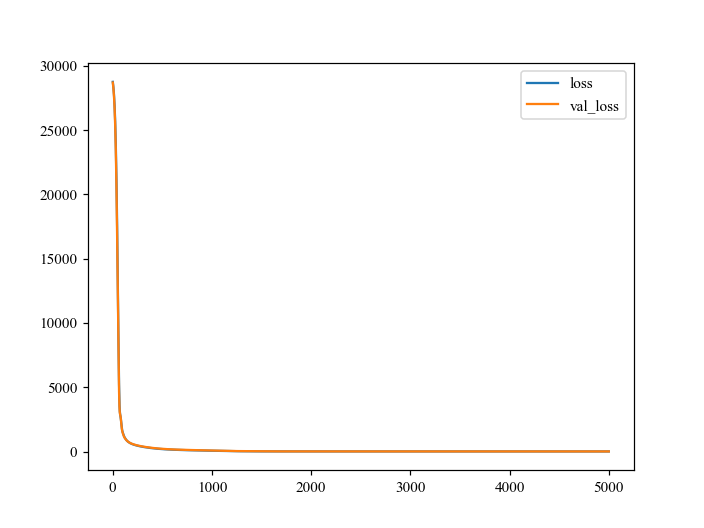

In [38]:
plt.figure()
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()
plt.savefig('./Fe-C/Loss.jpg')

In [39]:
model.load_weights(checkpoint_save_path)
y_train_predict = model.predict(x_train)
y_train_predict = np.array(y_train_predict).flatten()
y_test_predict = model.predict(x_test)
y_test_predict = np.array(y_test_predict).flatten()
# print(y_train.shape)
# print(y_train_predict)

<IPython.core.display.Javascript object>


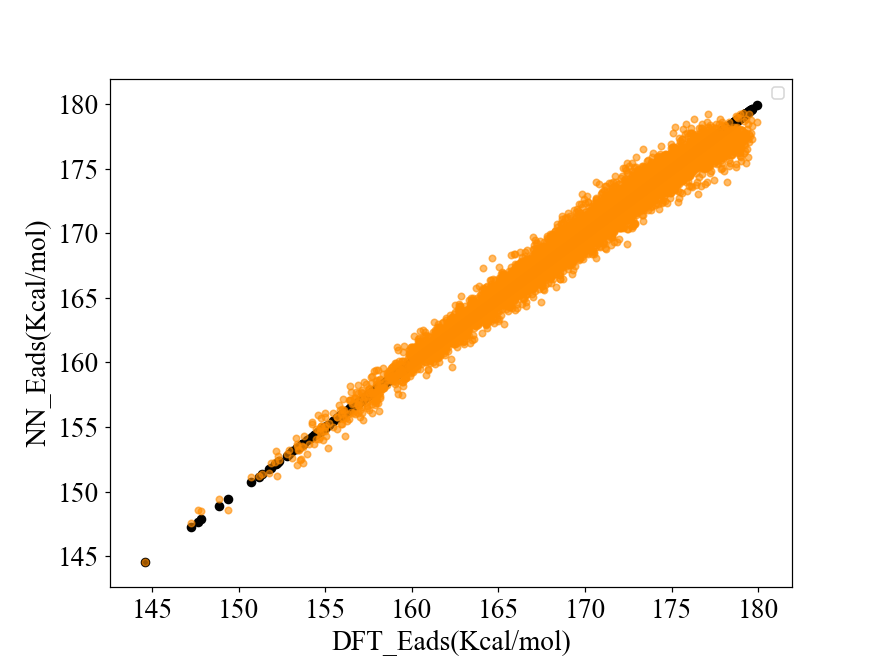

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [40]:
plt.figure(figsize=(8,6))
scale = 2
plt.xlim(min(y_train)-scale,max(y_train)+scale)
plt.ylim(min(y_train)-scale,max(y_train)+scale)

plt.scatter(y_train,y_train, color='black', s=28
#             ,linestyle='dotted'
           )
plt.scatter(y_train, y_train_predict, s=18, alpha=0.6,color='darkorange')

plt.xlabel('DFT_Eads(Kcal/mol)',fontsize=18)
plt.ylabel('NN_Eads(Kcal/mol)',fontsize=18)

x1 = np.arange(min(y_train),max(y_train),0.5)
# plt.plot(x1,x1-3.6,label='y=x-3.6')
plt.legend()

plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.legend()
plt.savefig('./Fe-C/Train.png')

<IPython.core.display.Javascript object>


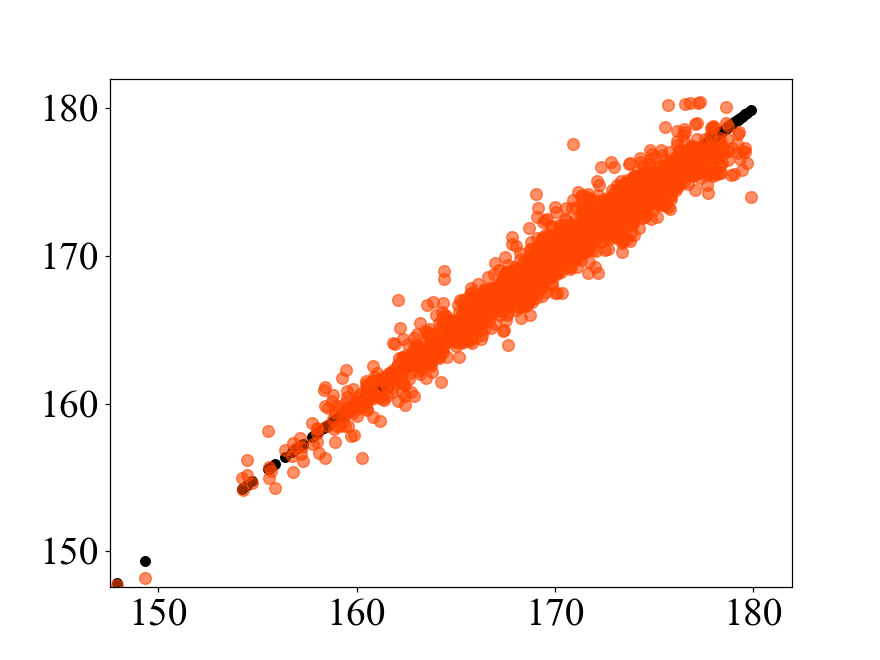

In [41]:
plt.figure(num=3,figsize=(8,6))
plt.rc('font',family='Times New Roman') 
scale = 2
plt.xlim(min(y_train)+3,max(y_train)+scale)
plt.ylim(min(y_train)+3,max(y_train)+scale)


plt.scatter(y_test,y_test, color='black', s=38
#             ,linestyle='dotted'
           )
plt.scatter(y_test,y_test_predict, s=58, alpha=0.6,color='orangered')

# plt.xlabel('DFT',fontsize=24)
# plt.ylabel('NN',fontsize=24)

plt.xticks(np.arange(150,185,10),fontsize=26,rotation=0)
plt.yticks(np.arange(150,185,10),fontsize=26)

plt.savefig('./Fe-C/Test.png', dpi=168, bbox_inches='tight')

In [21]:
import sklearn.metrics as sm
print("训练集------MAE: ",sm.mean_absolute_error(y_train,y_train_predict))
print("测试集------MAE: ",sm.mean_absolute_error(y_test,y_test_predict))
print("训练集------MSE: ",sm.mean_squared_error(y_train,y_train_predict))
print("测试集------MSE: ",sm.mean_squared_error(y_test,y_test_predict))
print("训练集------RMSE: ",np.sqrt(sm.mean_squared_error(y_train,y_train_predict)))
print("测试集------RMSE:: ",np.sqrt(sm.mean_squared_error(y_test,y_test_predict)))
print("训练集------R2_score: ",sm.r2_score(y_train,y_train_predict))
print("测试集------R2_score:: ",sm.r2_score(y_test,y_test_predict))

训练集------MAE:  0.6913631803442644
测试集------MAE:  0.8793595232958518
训练集------MSE:  0.7965684003202183
测试集------MSE:  1.3822524033770505
训练集------RMSE:  0.8925068068761258
测试集------RMSE::  1.1756923081219213
训练集------R2_score:  0.9708788316452636
测试集------R2_score::  0.9475344579192067


In [22]:
print(len(model.weights))
print(len(model.trainable_weights))
print(len(model.non_trainable_weights))

8
8
0
